In [1]:
import requests

In [2]:
from urllib.parse import quote
import  string
import pandas as pd
import numpy as np

In [3]:
from bs4 import BeautifulSoup
from lxml import etree
from PIL import Image

In [4]:
import urllib.request
import re
import os
import urllib
import time
import sys
import math

In [5]:
def getHtml(url):
    page = urllib.request.urlopen(url)
    html = page.read().decode('utf-8')
    return html

def getHtml_b(url):              ##不同的读取方式，此为字节读入
    page = urllib.request.urlopen(url)
    html = page.read()
    return html

In [6]:
def saveImg(img_url, file_name):
    resp = requests.get(image_url)
    page = resp.content
    save(page, file_name)

In [7]:
####用来获取lxml里面大部分内容
def getText(elem):
    rc = []
    for node in elem.itertext():
        #print(node)
        rc.append(node.strip())
    return '#'.join(rc)


In [8]:
## 获取所有人的个人页面
start = time.time()
href_list = []
for sex in range(2):
    urls = r'http://4shei.cn/index.php?g=Wap&m=Hongniang&a=sqsearch&token=hqcqon1491370665&sex='\
    +str(sex+1)+'&age=&profession=&__hash__=e4bf9cf4d98a90d4946c7eea29a5bf09_b34391c0a19f46733bf75679f7fd7de0'
    data = getHtml_b(urls)
    tmp_str = '上一页</a> 1/'.encode()   ###获取总页数
    pages = int(data[data.find(tmp_str)+16:data.find(tmp_str)+20])
    for page in range(pages):
        url = urls + '&p=' +str(page)
        data = getHtml(url)
        soup = BeautifulSoup(data,'html.parser')
        t1 = soup.find_all('a')
      #  href_list = []
        for t2 in t1:
            t3 = t2.get('href')
            if 'sq_source' in t3:
                t3 = quote(t3, safe = string.printable)   ### 把url里面的中文变成编码
                href_list.append('http://4shei.cn'+t3)
        
end = time.time()
print(end-start)

245.34282612800598


# 下载图片

In [11]:


def getImg(html,start):
    #reg = 'src="(http(s)?://.+?\.jpe?g)"'
    reg = 'src="(.+?\.(?:jpg|jpeg|gif|png|JPG))"'
    #reg = '^http(s)?://.+\.(jp(e)?g|png)$'
    #'img src="http://.*\.(?:jpg|gif|png)"'
    imgre = re.compile(reg)
    if re.findall(imgre, html)==[]:
        print(html)
        sys.exit(0)
    imgurl = re.findall(imgre, html)[0]
    pic_id = re.findall('LoveID：(\d*)', html)[0]
    try:
        u = urllib.request.urlopen(imgurl)
        data = u.read()
        f = open('D:\\11.something_funny\\'+ pic_id+'.jpg', 'wb+')
        f.write(data)
        print('正在保存的一张图片为'+ pic_id)
        print('pic_num:' + str(start))
        f.close()
    except urllib.request.URLError as e:
        print (e.reason)


    return imgurl


start = 0
for href in href_list[start:]:
    data = getHtml(href)
    print(getImg(data,start))
    start += 1

    

正在保存的一张图片为10703598
pic_num:14000
http://m.hongniang.com/public/images/woman.jpg
正在保存的一张图片为10704195
pic_num:14001
http://m.hongniang.com/public/images/woman.jpg
正在保存的一张图片为10576796
pic_num:14002
http://m.hongniang.com/data/upload/photo/20170625/594f0c22a3007_big.jpeg
正在保存的一张图片为10705181
pic_num:14003
http://m.hongniang.com/public/images/woman.jpg
正在保存的一张图片为10658938
pic_num:14004
http://m.hongniang.com/data/upload/photo/20180810/5b6d006ec91de_original.jpg
正在保存的一张图片为10576575
pic_num:14005
http://m.hongniang.com/data/upload/photo/20170623/594d29d6d8954_big.jpeg
正在保存的一张图片为10703406
pic_num:14006
http://m.hongniang.com/public/images/woman.jpg
正在保存的一张图片为10703005
pic_num:14007
http://m.hongniang.com/public/images/woman.jpg
正在保存的一张图片为10705182
pic_num:14008
http://m.hongniang.com/public/images/woman.jpg
正在保存的一张图片为10568180
pic_num:14009
http://m.hongniang.com/data/upload/photo/20181112/5be9180a31a80_original.jpg
正在保存的一张图片为10701858
pic_num:14010
http://m.hongniang.com/data/upload/photo/20181216/5c15e

正在保存的一张图片为10701988
pic_num:14094
http://m.hongniang.com/public/images/woman.jpg
正在保存的一张图片为10592870
pic_num:14095
http://m.hongniang.com/data/upload/photo/20170702/5958c826702f7_big.jpeg
正在保存的一张图片为10528810
pic_num:14096
http://m.hongniang.com/public/images/woman.jpg
正在保存的一张图片为10702310
pic_num:14097
http://m.hongniang.com/public/images/woman.jpg
正在保存的一张图片为10515936
pic_num:14098
http://m.hongniang.com/public/images/woman.jpg
正在保存的一张图片为10703527
pic_num:14099
http://m.hongniang.com/public/images/woman.jpg
正在保存的一张图片为330594
pic_num:14100
http://m.hongniang.com/data/upload/photo/20181112/5be918170a2e1_original.jpg
正在保存的一张图片为10705131
pic_num:14101
http://m.hongniang.com/public/images/woman.jpg
正在保存的一张图片为10705132
pic_num:14102
http://m.hongniang.com/public/images/woman.jpg
正在保存的一张图片为10573794
pic_num:14103
http://m.hongniang.com/data/upload/photo/20170912/59b7edd73855e_big.jpeg
正在保存的一张图片为10701908
pic_num:14104
http://m.hongniang.com/public/images/woman.jpg
正在保存的一张图片为10733462
pic_num:14105
http://

正在保存的一张图片为10704281
pic_num:14188
http://m.hongniang.com/public/images/woman.jpg
正在保存的一张图片为10705147
pic_num:14189
http://m.hongniang.com/public/images/woman.jpg
正在保存的一张图片为10704109
pic_num:14190
http://m.hongniang.com/public/images/woman.jpg
正在保存的一张图片为10623062
pic_num:14191
http://m.hongniang.com/data/upload/photo/20170813/598fe77a2cfe6_original.jpg
正在保存的一张图片为10386883
pic_num:14192
http://m.hongniang.com/public/images/woman.jpg
正在保存的一张图片为10702902
pic_num:14193
http://m.hongniang.com/public/images/woman.jpg
正在保存的一张图片为10628281
pic_num:14194
http://m.hongniang.com/data/upload/photo/20170805/5984d57fda4c1_big.jpeg
正在保存的一张图片为10658733
pic_num:14195
http://m.hongniang.com/public/images/woman.jpg
正在保存的一张图片为10704289
pic_num:14196
http://m.hongniang.com/public/images/woman.jpg
正在保存的一张图片为10658732
pic_num:14197
http://m.hongniang.com/public/images/woman.jpg
正在保存的一张图片为10705148
pic_num:14198
http://m.hongniang.com/public/images/woman.jpg
正在保存的一张图片为10657800
pic_num:14199
http://m.hongniang.com/public/i

正在保存的一张图片为10702499
pic_num:14283
http://m.hongniang.com/public/images/woman.jpg
正在保存的一张图片为10704228
pic_num:14284
http://m.hongniang.com/public/images/woman.jpg
正在保存的一张图片为10705093
pic_num:14285
http://m.hongniang.com/public/images/woman.jpg
正在保存的一张图片为10570751
pic_num:14286
http://m.hongniang.com/data/upload/photo/20171009/59db2bfddca0b_original.jpg
正在保存的一张图片为26130
pic_num:14287
http://m.hongniang.com/public/images/woman.jpg
正在保存的一张图片为10738973
pic_num:14288
http://m.hongniang.com/public/images/woman.jpg
正在保存的一张图片为10704302
pic_num:14289
http://m.hongniang.com/public/images/woman.jpg
正在保存的一张图片为10704008
pic_num:14290
http://m.hongniang.com/public/images/woman.jpg
正在保存的一张图片为10704006
pic_num:14291
http://m.hongniang.com/public/images/woman.jpg
正在保存的一张图片为287993
pic_num:14292
http://m.hongniang.com/data/upload/photo/20171221/5a3b883180862_big.jpeg
正在保存的一张图片为10702767
pic_num:14293
http://m.hongniang.com/public/images/woman.jpg
正在保存的一张图片为10705095
pic_num:14294
http://m.hongniang.com/public/images

正在保存的一张图片为10383581
pic_num:14382
http://m.hongniang.com/public/images/woman.jpg
正在保存的一张图片为10733393
pic_num:14383
http://m.hongniang.com/public/images/woman.jpg
正在保存的一张图片为10733540
pic_num:14384
http://m.hongniang.com/public/images/woman.jpg
正在保存的一张图片为10704192
pic_num:14385
http://m.hongniang.com/public/images/woman.jpg
正在保存的一张图片为10705048
pic_num:14386
http://m.hongniang.com/public/images/woman.jpg
正在保存的一张图片为10492996
pic_num:14387
http://m.hongniang.com/data/upload/photo/20170518/591d107096188_big.jpg
正在保存的一张图片为10576684
pic_num:14388
http://m.hongniang.com/data/upload/photo/20170715/59696dc0ce9da_original.jpg
正在保存的一张图片为10515934
pic_num:14389
http://m.hongniang.com/public/images/woman.jpg
正在保存的一张图片为10633605
pic_num:14390
http://m.hongniang.com/public/images/woman.jpg
正在保存的一张图片为10571597
pic_num:14391
http://m.hongniang.com/data/upload/photo/20171009/59db2bec02caf_original.jpg
正在保存的一张图片为10658426
pic_num:14392
http://m.hongniang.com/public/images/woman.jpg
正在保存的一张图片为10705051
pic_num:14393
ht

正在保存的一张图片为10705008
pic_num:14478
http://m.hongniang.com/public/images/woman.jpg
正在保存的一张图片为10636902
pic_num:14479
http://m.hongniang.com/public/images/woman.jpg
正在保存的一张图片为10705009
pic_num:14480
http://m.hongniang.com/public/images/woman.jpg
正在保存的一张图片为330557
pic_num:14481
http://m.hongniang.com/public/images/woman.jpg
正在保存的一张图片为10562908
pic_num:14482
http://m.hongniang.com/data/upload/photo/20170619/594718a164d81_original.jpg
正在保存的一张图片为10705012
pic_num:14483
http://m.hongniang.com/public/images/woman.jpg
正在保存的一张图片为10612241
pic_num:14484
http://m.hongniang.com/public/images/woman.jpg
正在保存的一张图片为10733559
pic_num:14485
http://m.hongniang.com/public/images/woman.jpg
正在保存的一张图片为10383473
pic_num:14486
http://m.hongniang.com/public/images/woman.jpg
正在保存的一张图片为10571514
pic_num:14487
http://m.hongniang.com/public/images/woman.jpg
正在保存的一张图片为10576881
pic_num:14488
http://m.hongniang.com/public/images/woman.jpg
正在保存的一张图片为10733556
pic_num:14489
http://m.hongniang.com/public/images/woman.jpg
正在保存的一张图片为10

正在保存的一张图片为339387
pic_num:14575
http://m.hongniang.com/data/upload/photo/20170329/58db2e4f397cb_big.jpeg
正在保存的一张图片为10704219
pic_num:14576
http://m.hongniang.com/public/images/woman.jpg
正在保存的一张图片为10350851
pic_num:14577
http://m.hongniang.com/data/upload/photo/20170406/58e59df2b486c_big.jpg
正在保存的一张图片为10704098
pic_num:14578
http://m.hongniang.com/public/images/woman.jpg
正在保存的一张图片为10704979
pic_num:14579
http://m.hongniang.com/public/images/woman.jpg
正在保存的一张图片为10704980
pic_num:14580
http://m.hongniang.com/public/images/woman.jpg
正在保存的一张图片为10704981
pic_num:14581
http://m.hongniang.com/data/upload/photo/20180722/5b5412bd7fa53_original.jpg
正在保存的一张图片为10704982
pic_num:14582
http://m.hongniang.com/public/images/woman.jpg
正在保存的一张图片为10730051
pic_num:14583
http://m.hongniang.com/public/images/woman.jpg
正在保存的一张图片为10704984
pic_num:14584
http://m.hongniang.com/public/images/woman.jpg
正在保存的一张图片为10704985
pic_num:14585
http://m.hongniang.com/public/images/woman.jpg
正在保存的一张图片为10704986
pic_num:14586
http://m

In [9]:
### 定义获取资料函数
def get_info(href,dic):
    data = getHtml_b(href)
    soup = BeautifulSoup(data,'html.parser')
    tree = etree.HTML(data, parser=etree.HTMLParser(encoding='utf-8'))
    node0 = tree.xpath("//div[@class='detailstc']/p")[0]   ##ID
    text=getText(node0)
    dic['ID'] = text[7:]
    
    node1 = tree.xpath("//div[@class='detailstc']/h3")[0]   ##姓名
    text=getText(node1)
    idx = text.find('#',0)
    dic['姓名'] = text[0:idx]

    node=tree.xpath("//div[@class='detailsr']")[0]   ##基本信息
    #node = etree.tostring(node, encoding = "utf-8", pretty_print = True, method = "html")
    txt=getText(node)
    idx = -1
    ###性别
    idx = txt.find('#',idx+1)
    if txt[idx+1:idx+3]=='性别':
        dic['性别'] = txt[idx+4]
        idx = txt.find('#',idx+1)
        idx = txt.find('#',idx+1)
    ###年龄
    if txt[idx+3]=='岁':
        dic['年龄'] = txt[idx+1:idx+3]
        idx = txt.find('#',idx+1)
        idx = txt.find('#',idx+1)
    ###身高
    if txt[idx+4:idx+6]=='cm':
        dic['身高'] = txt[idx+1:idx+4]
        idx = txt.find('#',idx+1)
        idx = txt.find('#',idx+1)
    ###籍贯
    if txt[idx+1:idx+3]=='籍贯':
        idx_tmp = txt.find('#',idx+1)
        dic['籍贯'] = txt[idx+4:idx_tmp]
        idx = txt.find('#',idx+1)
        idx = txt.find('#',idx+1)
    ###职业
    if txt[idx+1:idx+3]=='职业':
        idx_tmp = txt.find('#',idx+1)
        dic['职业'] = txt[idx+4:idx_tmp]
        idx = txt.find('#',idx+1)
        idx = txt.find('#',idx+1)
    ###工作单位
    if txt[idx+1:idx+5]=='工作单位':
        idx_tmp = txt.find('#',idx+1)
        dic['工作单位'] = txt[idx+6:idx_tmp]
        idx = txt.find('#',idx+1)
        idx = txt.find('#',idx+1)
    ###婚姻状况
    marr_state = ['未婚','离异未育','离异有孩子','丧偶有孩子','丧偶未育']
    idx_tmp = txt.find('#',idx+1)
    if txt[idx+1:idx_tmp] in marr_state:
        dic['婚姻状况'] = txt[idx+1:idx_tmp]
        idx = txt.find('#',idx+1)
        idx = txt.find('#',idx+1)
    ####体重
    if txt[idx+1:idx+3]=='体重':
        idx_tmp = txt.find('#',idx+1)
        dic['体重'] = txt[idx+4:idx_tmp]
        idx = txt.find('#',idx+1)
        idx = txt.find('#',idx+1)
    ####学历
    if txt[idx+1:idx+3]=='学历':
        idx_tmp = txt.find('#',idx+1)
        dic['学历'] = txt[idx+7:idx_tmp]
        idx = txt.find('#',idx+1)
        idx = txt.find('#',idx+1)
    ####年收入
    if txt[idx+1:idx+4]=='年收入':
        idx_tmp = txt.find('#',idx+1)
        dic['年收入'] = txt[idx+5:idx_tmp]
        idx = txt.find('#',idx+1)
        idx = txt.find('#',idx+1)
    ####是否有房
    if txt[idx+1:idx+5]=='是否有房':
        idx_tmp = txt.find('#',idx+1)
        dic['是否有房'] = txt[idx+6:idx_tmp]
        idx = txt.find('#',idx+1)
        idx = txt.find('#',idx+1)
     ####是否有车
    if txt[idx+1:idx+5]=='是否有车':
        idx_tmp = txt.find('#',idx+1)
        dic['是否有车'] = txt[idx+6:idx_tmp]
        idx = txt.find('#',idx+1)
        idx = txt.find('#',idx+1)
        
    node2 = tree.xpath("//div[@class='detailsr']")[1]   ##自我介绍
    text=getText(node2)
    dic['自我介绍'] = text.replace('#', '')
    node3 = tree.xpath("//div[@class='detailsr']")[2]   ##择偶要求
    text=getText(node3)
    dic['择偶要求'] = text.replace('#', '')
    
    return dic   

In [13]:
####将资料整理到dataframe中

people = []
dfObj = pd.DataFrame(people, columns = ['ID','姓名','性别', '年龄', '身高','籍贯','职业','工作单位','婚姻状况'
                                       ,'体重','学历','年收入','是否有房','是否有车','自我介绍'
                                        ,'择偶要求']) 

start = time.time()
dic = {}
for href in href_list:
    dic = get_info(href,dic)
    dfObj = dfObj.append(dic,ignore_index=True)
    dic.clear()
end = time.time()
print(end-start)


4582.079960107803


In [14]:
dfObj.to_csv('total.csv',encoding='utf_8_sig')

In [8]:
dfObj = pd.read_csv('total.csv')

# 词云制作

In [9]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import jieba
import matplotlib.font_manager as fm
from wordcloud import WordCloud,ImageColorGenerator

In [23]:
dfboy = dfObj[dfObj['性别']=='男']
dfgirl = dfObj[dfObj['性别']=='女']
boy_self_intr = dfboy['自我介绍'].dropna(axis=0,how='any')
girl_self_intr = dfgirl['自我介绍'].dropna(axis=0,how='any')
boy_spouse_req = dfboy['择偶要求'].dropna(axis=0,how='any')
girl_spouse_req = dfgirl['择偶要求'].dropna(axis=0,how='any')

jieba.del_word("喜欢")
jieba.del_word("一个")
jieba.del_word("以上")
jieba.del_word("身高")   ###无奈，词频过高。。。
jieba.del_word("性格")  ###去掉无意义的个别干扰词

#boy's self introduction
bsi_word_str = ''
for strs in boy_self_intr:
    bsi_word_str+=strs
bsi_wordlist = jieba.cut(bsi_word_str,cut_all=False)  #采用精确模式
bsi_wl = " ".join(bsi_wordlist)

#girl's self introduction
gsi_word_str = ''
for strs in girl_self_intr:
    gsi_word_str+=strs
gsi_wordlist = jieba.cut(gsi_word_str,cut_all=False)
gsi_wl = " ".join(gsi_wordlist)
# boy's spouse request
bsr_word_str = ''
for strs in boy_spouse_req:
    bsr_word_str+=strs
bsr_wordlist = jieba.cut(bsr_word_str,cut_all=False)
bsr_wl = " ".join(bsr_wordlist)
# girl's spouse request
gsr_word_str = ''
for strs in girl_spouse_req:
    gsr_word_str+=strs
gsr_wordlist = jieba.cut(gsr_word_str,cut_all=False)
gsr_wl = " ".join(gsr_wordlist)

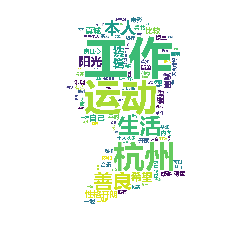

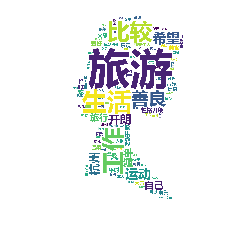

In [22]:
backgroud_Image_Man = plt.imread(r"D:\360MoveData\Users\Administrator\Desktop\man.jpg")
backgroud_Image_Woman = plt.imread(r"D:\360MoveData\Users\Administrator\Desktop\woman.jpg")
font_path = r'C:\Windows\Fonts\msyhbd.ttc'

wc_man = WordCloud(font_path=font_path,  # 设置字体
               background_color="white",  # 背景颜色
              #background_color=None,
              #mode="RGBA",
               max_words=100,  # 词云显示的最大词数
               mask=backgroud_Image_Man,  # 设置背景图片
               max_font_size=500,  # 字体最大值
               scale=4,
               )
wc_woman = WordCloud(font_path=font_path,  # 设置字体
               background_color="white",  # 背景颜色
               max_words=100,  # 词云显示的最大词数
               mask=backgroud_Image_Woman,  # 设置背景图片
               max_font_size=500,  # 字体最大值
               scale=4,
               )

bsi_word = wc_man.generate(bsi_wl) #生成词云
bsi_word.to_file('selfIntr_boy.jpg') 
gsi_word = wc_woman.generate(gsi_wl) #生成词云
gsi_word.to_file('selfIntr_girl.jpg') 

#展示词云图
plt.imshow(bsi_word)
plt.axis("off")
plt.show()

plt.imshow(gsi_word)
plt.axis("off")
plt.show()


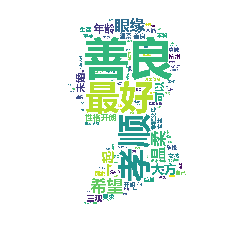

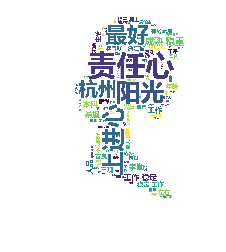

In [24]:
backgroud_Image_Man = plt.imread(r"D:\360MoveData\Users\Administrator\Desktop\man.jpg")
backgroud_Image_Woman = plt.imread(r"D:\360MoveData\Users\Administrator\Desktop\woman.jpg")
font_path = r'C:\Windows\Fonts\msyhbd.ttc'

wc_man = WordCloud(font_path=font_path,  # 设置字体
               background_color="white",  # 背景颜色
              #background_color=None,
              #mode="RGBA",
               max_words=100,  # 词云显示的最大词数
               mask=backgroud_Image_Man,  # 设置背景图片
               max_font_size=500,  # 字体最大值
               scale=4,
               )
wc_woman = WordCloud(font_path=font_path,  # 设置字体
               background_color="white",  # 背景颜色
               max_words=100,  # 词云显示的最大词数
               mask=backgroud_Image_Woman,  # 设置背景图片
               max_font_size=500,  # 字体最大值
               scale=4,
               )

bsr_word = wc_man.generate(bsr_wl) #生成词云
bsr_word.to_file('spouseReq_boy.jpg') 
gsr_word = wc_woman.generate(gsr_wl) #生成词云
gsr_word.to_file('spouseReq_girl.jpg') 

#展示词云图
plt.imshow(bsr_word)
plt.axis("off")
plt.show()

plt.imshow(gsr_word)
plt.axis("off")
plt.show()

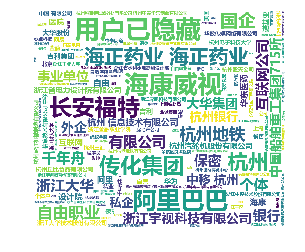

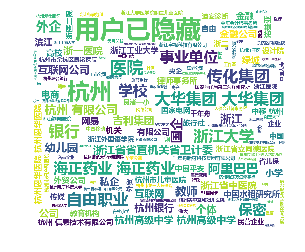

In [25]:
##工作单位的词云
g_wl = " ".join(dfObj[dfObj['性别']=='女']['工作单位'].dropna(axis=0,how='any'))
b_wl = " ".join(dfObj[dfObj['性别']=='男']['工作单位'].dropna(axis=0,how='any'))
font_path = r'C:\Windows\Fonts\msyhbd.ttc'


b_wc = WordCloud(font_path=font_path,  # 设置字体
               background_color="white",  # 背景颜色
               max_words=150,  # 词云显示的最大词数
               #mask=back_coloring,  # 设置背景图片
               max_font_size=100,  # 字体最大值
               random_state=42,
               width=1000, height=860, margin=2,# 设置图片默认的大小,但是如果使用背景图片的话,那么保存的图片大小将会按照其大小保存,margin为词语边缘距离
               )
g_wc = WordCloud(font_path=font_path,  # 设置字体
               background_color="white",  # 背景颜色
               max_words=150,  # 词云显示的最大词数
               #mask=back_coloring,  # 设置背景图片
               max_font_size=100,  # 字体最大值
               random_state=42,
               width=1000, height=860, margin=2,# 设置图片默认的大小,但是如果使用背景图片的话,那么保存的图片大小将会按照其大小保存,margin为词语边缘距离
               )



b_career_word = b_wc.generate(b_wl) #生成词云
b_career_word.to_file('career_boy.jpg')  
g_career_word = g_wc.generate(g_wl) #生成词云
g_career_word.to_file('career_girl.jpg')  

#展示词云图
plt.imshow(b_career_word)
plt.axis("off")
plt.show()

plt.imshow(g_career_word)
plt.axis("off")
plt.show()


In [17]:
def wordCount(segment_list):
    '''
        该函数实现词频的统计，并将统计结果存储至本地。
        在制作词云的过程中用不到，主要是在画词频统计图时用到。
    '''
    word_lst = []
    word_dict = {}
    with open('D:\jupyter_notebook_script\词频统计(去停用词).txt','w') as wf2: 
        word_lst.append(segment_list.split(' ')) 
        for item in word_lst:
            for item2 in item:
                if item2 not in word_dict: 
                    word_dict[item2] = 1
                else:
                    word_dict[item2] += 1

        word_dict_sorted = dict(sorted(word_dict.items(), \
        key = lambda item:item[1], reverse=True))#按照词频从大到小排序
        for key in word_dict_sorted:
            wf2.write(key+' '+str(word_dict_sorted[key])+'\n') 
    wf2.close()

wordCount(wl)

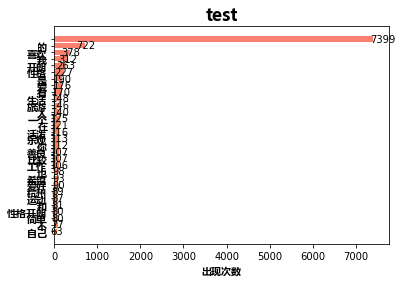

In [18]:
# drawBar.py
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
from matplotlib.font_manager import *
import numpy as np

def drawStatBarh():
    """
    画出词频统计条形图，用渐变颜色显示，选取前N个词频
    """
    fig, ax = plt.subplots()
    myfont = FontProperties(fname= r'C:\Windows\Fonts\msyhbd.ttc') 
    N = 30
    words = []
    counts = []
    for line in open('D:\jupyter_notebook_script\词频统计(去停用词).txt'):
        line.strip('\n')
        words.append(line.split(' ')[0])
        counts.append(int(line.split(' ')[1].strip('\n')))

    y_pos = np.arange(N)

    colors = ['#FA8072'] #这里是为了实现条状的渐变效果，以该色号为基本色实现渐变效果
    for i in range(len(words[:N]) - 1):
        colors.append('#FA' + str(int(colors[-1][3:]) - 1))

    rects = ax.barh(y_pos, counts[:N], align='center', color=colors)

    ax.set_yticks(np.arange(N))
    ax.set_yticklabels(words[:N],fontproperties=myfont)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_title('test',fontproperties=myfont, fontsize=17)
    ax.set_xlabel(u"出现次数",fontproperties=myfont)

    autolabel(rects, ax)
    plt.show()


def autolabel(rects, ax):
    """
    给条形图加上文字标签
    """
    #fig, ax = plt.subplots()
    for rect in rects:
        width = rect.get_width()
        ax.text(1.03 * width, rect.get_y() + rect.get_height()/2.,  
            '%d' % int(width),ha='center', va='center')

        
drawStatBarh()

##   家乡统计

In [29]:
counties = ['北京','天津','河北','山西','内蒙古','辽宁','吉林','黑龙江','上海',
          '江苏','浙江','安徽','福建','江西','山东','河南','湖北','湖南','重庆',
          '四川','贵州','云南','西藏','陕西','甘肃','青海','宁夏','新疆','香港','澳门','台湾']
county_cal = {}
for c in counties:
    county_cal[c]=0

dfObj.isnull().sum()
data_without_NaN =dfObj['籍贯'].dropna(axis=0)

for city in data_without_NaN:
    for county in counties:
        if county in city:
            county_cal[county]=county_cal[county]+1


In [15]:
#url = r'http://4shei.cn/index.php?g=Wap&m=Hongniang&a=sqsearch&token=hqcqon1491370665'
#data = getHtml(url)

## 颜值评分

In [1]:
%matplotlib inline

import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.rcParams['font.size'] = 6
plt.rcParams['figure.figsize'] = (6,6)
from collections import Counter

import pandas as pd
import numpy as np
from keras.models import load_model
from keras.preprocessing.image import array_to_img, img_to_array, load_img
from scipy.misc import imresize

from PIL import Image

F:\anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
model = load_model(r'D:\13.trained_model\model.h5')
img_height, img_width, channels = 350, 350, 3

In [3]:
plt.rcParams['font.size'] = 6
plt.rcParams['figure.figsize'] = (6,6)
img_list = os.listdir(r'D:\11.something_funny')
predict_list = []
for img_dir in img_list:
    img = load_img(r'D:\11.something_funny\\' + img_dir)
    #plt.imshow(img)
    img_name = img_dir.split('.')[0]
    #print(img_name)
    img = imresize(img, size=(img_height, img_width))
    test_x = img_to_array(img).reshape(img_height, img_width, channels)
    test_x = test_x / 255.
    test_x = test_x.reshape((1,) + test_x.shape)
    predicted = model.predict(test_x)
    predict_list.append(predicted)
#     if predicted>4.2:
#         print("predicted: %.2f" % predicted[0][0])
#         plt.imshow(img)
#         plt.axis("off")
#         plt.show()

F:\anaconda\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  # Remove the CWD from sys.path while we load stuff.


In [21]:
import pandas as pd
data = pd.DataFrame(v[0] for v in predict_list)

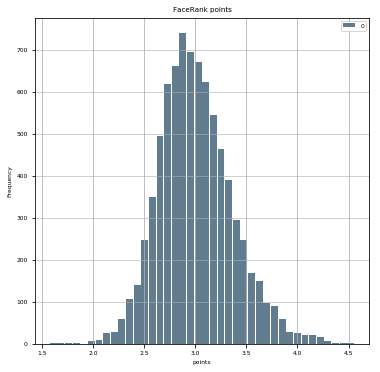

In [28]:
data.plot.hist(grid=True, bins=40, rwidth=0.9,color='#607c8e')
plt.title('FaceRank points')
plt.xlabel('points')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.savefig('FaceRank.png', dpi=100)